 Bibliotheken & Daten einlesen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# URLs
base = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(base + "umsatzdaten_gekuerzt.csv")
df_wetter = pd.read_csv(base + "wetter.csv")
df_kiwo = pd.read_csv(base + "kiwo.csv")



Datenvorbereitung & Merging

In [2]:
# Datum in datetime umwandeln
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])
df_kiwo['Datum'] = pd.to_datetime(df_kiwo['Datum'])

# Mergen
merged = df_umsatz.merge(df_wetter, on='Datum', how='left')
merged = merged.merge(df_kiwo, on='Datum', how='left')


# Wettercode


### Frequency


In [3]:
# Show first 5 rows
print("First 5 rows of weather data:")
print(df_wetter.head())

# Show column names and data types
print("\nColumns and data types:")
print(df_wetter.dtypes)



# Frequency table of weather codes
weather_code_freq = df_wetter['Wettercode'].value_counts()

print("Weather code frequencies:")
print(weather_code_freq)
# Zeige ALLE Zeilen einer Ausgabe in voller Länge
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Jetzt wird die komplette Tabelle gezeigt
weather_code_freq

First 5 rows of weather data:
       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0 2012-01-01         8.0      9.8250                   14        58.0
1 2012-01-02         7.0      7.4375                   12         NaN
2 2012-01-03         8.0      5.5375                   18        63.0
3 2012-01-04         4.0      5.6875                   19        80.0
4 2012-01-05         6.0      5.3000                   23        80.0

Columns and data types:
Datum                  datetime64[ns]
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit             int64
Wettercode                    float64
dtype: object
Weather code frequencies:
Wettercode
61.0    594
21.0    260
0.0     212
10.0    189
5.0     163
63.0    131
20.0     68
95.0     41
80.0     33
71.0     26
22.0     25
65.0     25
45.0     20
25.0     17
28.0     17
51.0     14
49.0     10
53.0     10
77.0      9
73.0      9
3.0       7
69.0      6
81.0      6
68.0    

Wettercode
61.0    594
21.0    260
0.0     212
10.0    189
5.0     163
63.0    131
20.0     68
95.0     41
80.0     33
71.0     26
22.0     25
65.0     25
45.0     20
25.0     17
28.0     17
51.0     14
49.0     10
53.0     10
77.0      9
73.0      9
3.0       7
69.0      6
81.0      6
68.0      5
75.0      5
1.0       4
58.0      4
47.0      3
29.0      3
17.0      2
78.0      2
60.0      2
91.0      2
26.0      1
2.0       1
85.0      1
72.0      1
43.0      1
13.0      1
79.0      1
55.0      1
Name: count, dtype: int64

### Occurence

Wettercode  0.0   1.0   2.0   3.0   5.0   10.0  13.0  17.0  20.0  21.0  22.0  \
Month                                                                          
1              9     0     0     0     7    33     0     0     8    11     4   
2             14     0     0     2    13    28     0     0     9     8     7   
3             22     3     1     0    19    23     0     0     4    21     3   
4             21     0     0     0    30     8     0     0     2    19     4   
5             25     0     0     1    26     4     0     1     6    29     0   
6             20     0     0     0    12     1     0     1     4    27     0   
7             16     1     0     0    25     1     0     0    10    25     0   
8             19     0     0     1     7     1     0     0     3    33     0   
9             22     0     0     0     3     4     0     0     2    30     0   
10            19     0     0     1    13    26     0     0     8    19     0   
11            12     0     0     2     7

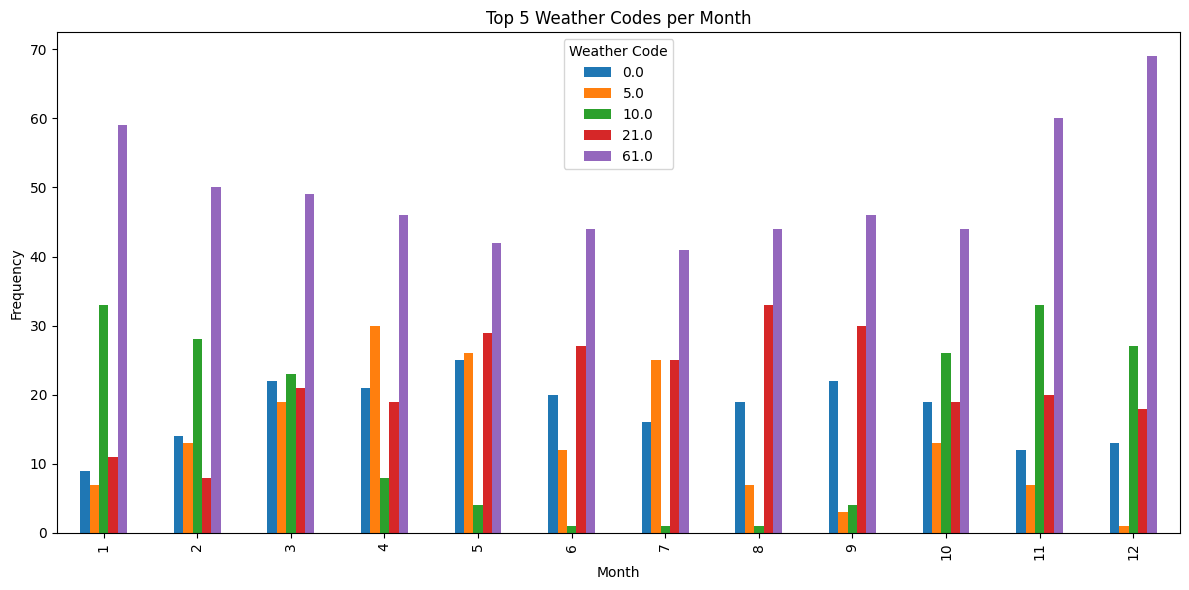

In [4]:
# Extract the month (as number 1–12)
df_wetter['Month'] = df_wetter['Datum'].dt.month

# Count how many times each weather code appears per month
weather_month_counts = df_wetter.groupby(['Month', 'Wettercode']).size().unstack(fill_value=0)

# Show the result
print(weather_month_counts)

# Count how many times each weather code appears per month
weather_month_counts = df_wetter.groupby(['Month', 'Wettercode']).size().unstack(fill_value=0)

# Show the result
print(weather_month_counts)

import matplotlib.pyplot as plt

# Get the top 5 most common weather codes
top_codes = df_wetter['Wettercode'].value_counts().nlargest(5).index

# Filter the data
df_top = df_wetter[df_wetter['Wettercode'].isin(top_codes)]

# Group and reshape
plot_data = df_top.groupby(['Month', 'Wettercode']).size().unstack().sort_index()

# Plot
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Weather Codes per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Weather Code')
plt.tight_layout()
plt.show()